In [6]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances

import scipy
import scipy.cluster.hierarchy as sch
import collections

sns.set_style('whitegrid')

## Problem definition

Cluster filghts based on day of week, departute time, carrier, airport, etc.

Dataset for clustering is "FlightsProcessed.csv". It is preprocessed dataset on EDA step of the current project.
Dataset can be downloaded from

https://drive.google.com/open?id=1ZUHNIgxMqRbeDUS4PE2W-vVss_BZMA8G

### Load the data

In [14]:
df=pd.read_csv("FlightsProcessedShort2.csv")
df.head()

,Unnamed: 0,Unnamed: 0.1,Month,DayofMonth,DayOfWeek,SchedDepTime,Carrier,TailNum,DepDelay,Origin,Distance
0,0,0,1,3,4,20,WN,N712SW,8,IAD,2
1,1,1,1,3,4,8,WN,N772SW,19,IAD,2
2,2,2,1,3,4,7,WN,N428WN,8,IND,2
3,3,3,1,3,4,18,WN,N464WN,34,IND,2
4,4,4,1,3,4,20,WN,N726SW,25,IND,2


## Feature Engineering

In [15]:
df=df.drop(df.columns[[0,1,2,3,6]], axis=1)
df.head()

,DayOfWeek,SchedDepTime,TailNum,DepDelay,Origin,Distance
0,4,20,N712SW,8,IAD,2
1,4,8,N772SW,19,IAD,2
2,4,7,N428WN,8,IND,2
3,4,18,N464WN,34,IND,2
4,4,20,N726SW,25,IND,2


In [16]:
#converting categorical data to numerical dummies values
#df['Carrier'] = pd.get_dummies(df['Carrier'])#since among 20000 records that we use for clustering only 1 carrier, we drop this column for analysis

df['Origin'] = pd.get_dummies(df['Origin']) #since among 20000 records that we use for clustering only 1 carrier, we drop this column for analysis
df['TailNum'] = pd.get_dummies(df['TailNum'])
# select the columns
X_columns = ['DayOfWeek', 'SchedDepTime', 'DepDelay', 'Origin', 'Distance','TailNum']

# normalize the columns
df_norm = df.copy()
for col in X_columns:
    df_norm[col] = StandardScaler().fit_transform(df_norm[col].values.reshape(-1, 1))

print(df.shape)
df_norm.head()

(20001, 6)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted

,DayOfWeek,SchedDepTime,TailNum,DepDelay,Origin,Distance
0,-0.139273,1.083698,-0.037442,-0.710246,-0.129122,0.263508
1,-0.139273,-1.878217,-0.037442,-0.372028,-0.129122,0.263508
2,-0.139273,-2.125043,-0.037442,-0.710246,-0.129122,0.263508
3,-0.139273,0.590046,-0.037442,0.089179,-0.129122,0.263508
4,-0.139273,1.083698,-0.037442,-0.187545,-0.129122,0.263508


## Model Training

In [17]:
k = 5
kmeans = KMeans(n_clusters=k).fit(df_norm.values)

print(set(kmeans.labels_))
print(collections.Counter(kmeans.labels_))

df_results = df.copy()
df_norm['cluster'] = kmeans.labels_
df_results['cluster'] = kmeans.labels_

{0, 1, 2, 3, 4}
Counter({3: 8951, 0: 7129, 4: 3565, 1: 328, 2: 28})


[(5, 1378), (4, 1307), (1, 1230), (7, 916), (6, 911)]
[(5, 69), (1, 62), (7, 60), (6, 42), (2, 41)]
[(5, 9), (7, 6), (4, 5), (1, 4), (6, 2)]
[(5, 1992), (4, 1963), (7, 1822), (1, 1209), (6, 980)]
[(4, 719), (5, 718), (7, 595), (6, 501), (1, 480)]
DayOfWeek


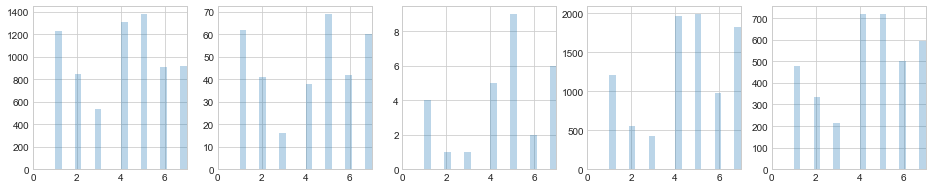

SchedDepTime


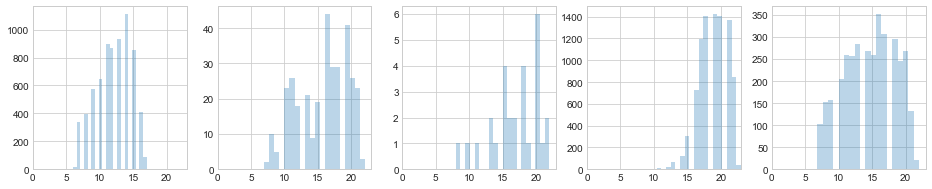

DepDelay


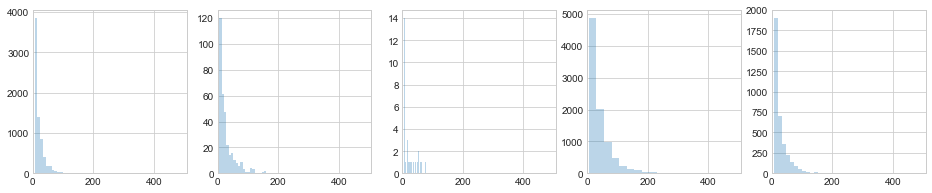

Origin


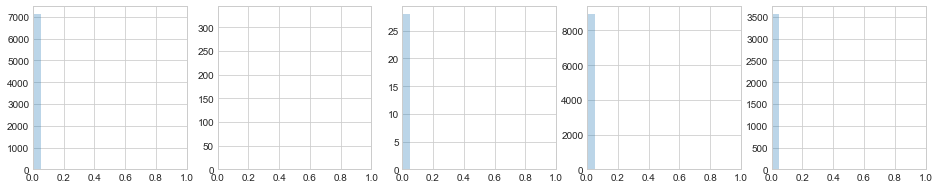

Distance


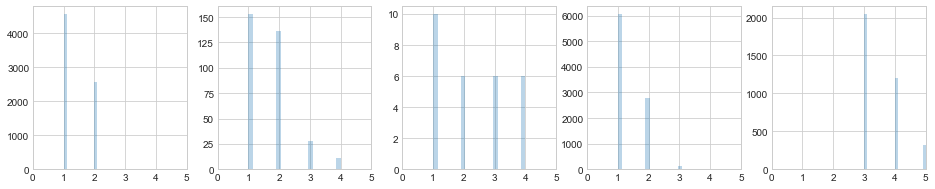

TailNum


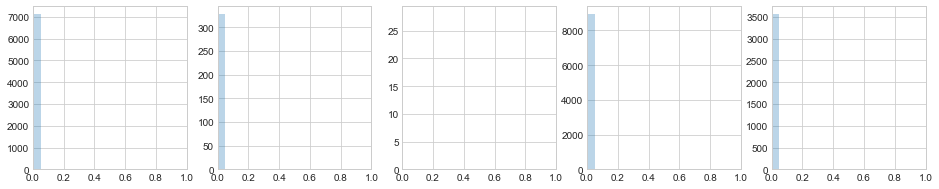

In [19]:
# Analyze the results
df_results = df_results.reset_index()
for cluster in sorted(set(kmeans.labels_)):
    print(collections.Counter(df_results[df_results['cluster']==cluster]['DayOfWeek']).most_common(5))

n_clusters = len(set(kmeans.labels_))
for col in X_columns:
    print(col)
    i = 1
    plt.figure(figsize=(16,3))
    for cluster in sorted(set(kmeans.labels_)):
        plt.subplot(1, n_clusters, i)
        plt.xlim([0,df_results[col].max()])
        plt.hist(df_results[df_results['cluster']==cluster][col], label=str(cluster), alpha=0.3, bins=20)
        i += 1
    plt.show()

In [20]:
# Analyze the centroids
df_results.groupby('cluster').mean().round(2).T

cluster,0,1,2,3,4
level_0,10222.47,10054.82,10096.11,9916.68,9758.52
index,10222.47,10054.82,10096.11,9916.68,9758.52
DayOfWeek,4.00,4.15,4.57,4.47,4.33
SchedDepTime,12.08,15.62,16.82,18.82,14.61
TailNum,0.00,0.00,1.00,0.00,0.00
DepDelay,20.85,28.33,22.29,40.74,27.70
Origin,0.00,1.00,0.00,0.00,0.00
Distance,1.36,1.69,2.29,1.34,3.51


DayOfWeek


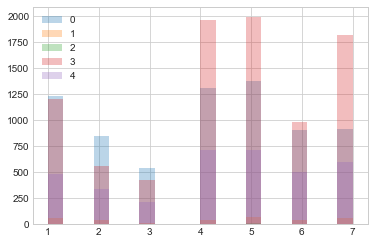

SchedDepTime


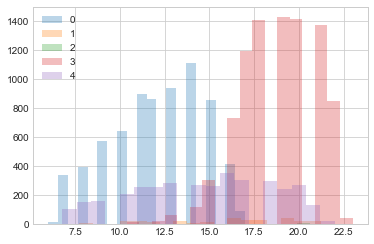

DepDelay


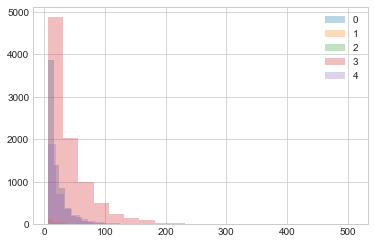

Origin


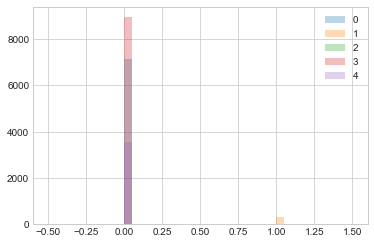

Distance


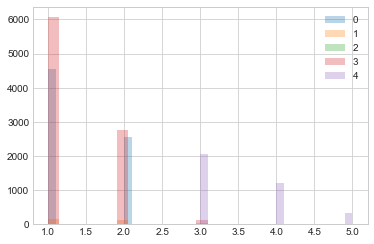

TailNum


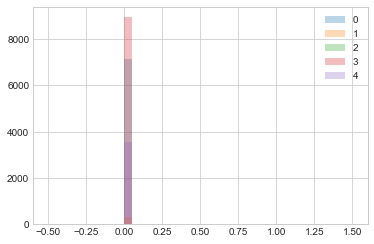

In [21]:
# Analyze the results
for col in X_columns:
    print(col)
    for cluster in set(kmeans.labels_):
        plt.hist(df_results[df_results['cluster']==cluster][col], label=str(cluster), alpha=0.3, bins=20)
    plt.legend()
    plt.show()

5
DayOfWeek


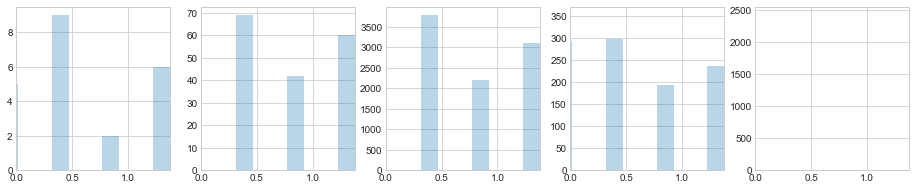

SchedDepTime


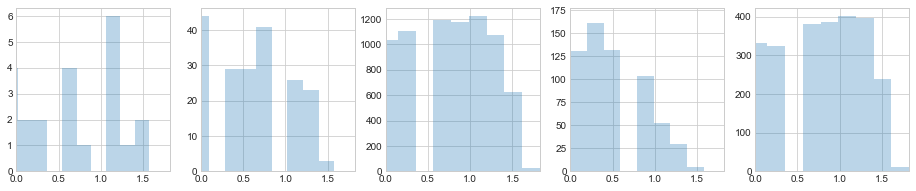

DepDelay


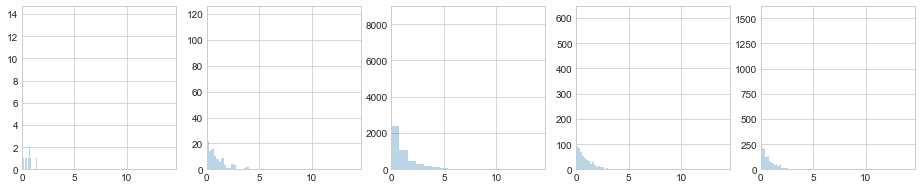

Origin


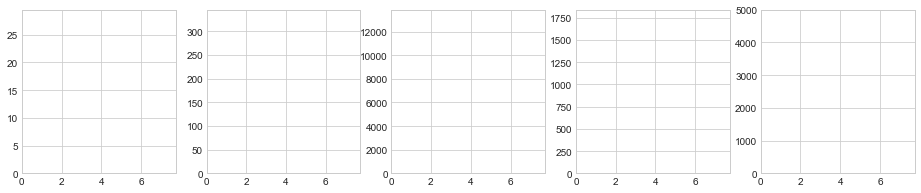

Distance


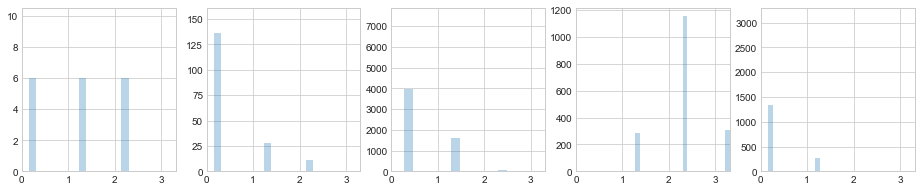

TailNum


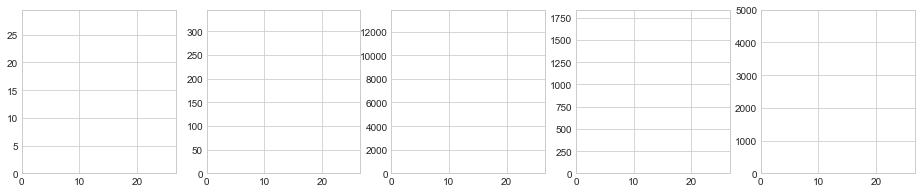

In [41]:
# Analyze the results
n_clusters = len(set(T))
print(n_clusters)
for col in X_columns:
    print(col)
    i = 1
    plt.figure(figsize=(16,3))
    for cluster in sorted(set(T)):
        plt.subplot(1, n_clusters, i)
        plt.xlim([0,df_results[col].max()])
        plt.hist(df_results[df_results['cluster']==cluster][col], label=str(cluster), alpha=0.3, bins=20)
        i += 1
    plt.show()

DayOfWeek


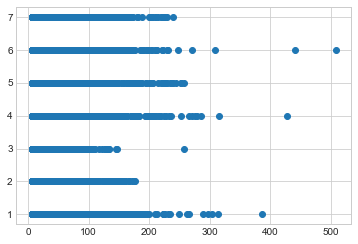

SchedDepTime


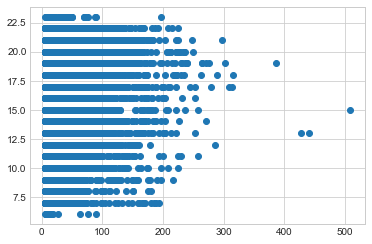

DepDelay


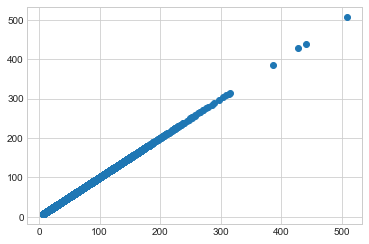

Origin


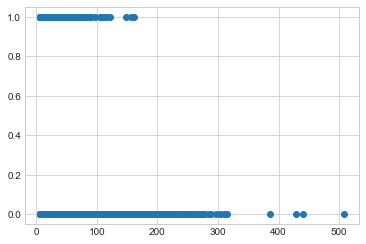

Distance


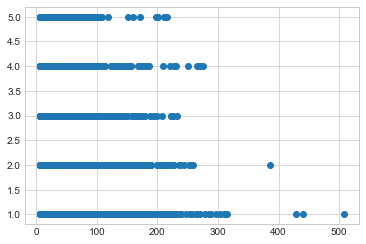

TailNum


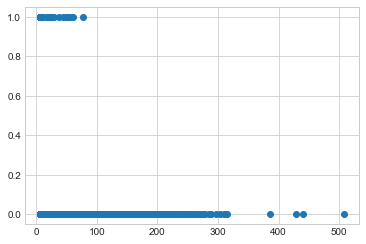

In [22]:
# Analyze the correlation with departure delay
for c in ['DayOfWeek', 'SchedDepTime', 'DepDelay', 'Origin', 'Distance','TailNum']:
    print(c)
    plt.plot(df_results['DepDelay'], df_results[c], 'o')
    plt.show()

## Model Evaluation

In [23]:
# Inter-Cluster
centroids = []
for cluster in sorted(set(kmeans.labels_)):
    centroids.append(df_norm[df_norm['cluster']==cluster][X_columns].mean().values)
distances = []
for c1 in centroids:
    for c2 in centroids:
        distances.append(euclidean_distances(c1.reshape(-1, 1), c2.reshape(-1, 1))[0][0])
print('Inter Cluster distance', np.mean(distances))

# Intra-Cluster
distances = []
for cluster in sorted(set(kmeans.labels_)):
    df_filter = df_norm[df_norm['cluster']==cluster]
    centroid = df_filter[X_columns].mean().values
    for k, v in df_filter[X_columns].iterrows():
        distances.append(euclidean_distances(centroid.reshape(-1, 1), v.values.reshape(-1, 1))[0][0])
print('Intra Cluster distance', np.mean(distances))

# Inertia
distances = []
for cluster in sorted(set(kmeans.labels_)):
    df_filter = df_norm[df_norm['cluster']==cluster]
    centroid = df_filter[X_columns].mean().values
    for k, v in df_filter[X_columns].iterrows():
        distances.append(euclidean_distances(centroid.reshape(1, -1), v.values.reshape(1, -1), squared=True)[0][0])
print('Inertia', np.sum(distances))

Inter Cluster distance 0.11826508214201123
Intra Cluster distance 0.8252159233181614
Inertia 52835.9162160502


<font color=blue>***Inter clauster distance exceeds intra cluster distance that indicates not effective cluster formation***</font>

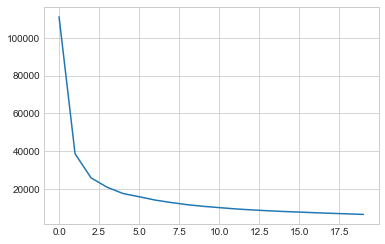

In [26]:
inertia = []
for k in range(2, 100,5):
    kmeans = KMeans(n_clusters=k).fit(df_norm.values)
    inertia.append(kmeans.inertia_)
plt.plot(inertia)
plt.show()